### Prediktion med hjälp av taxipris modellen pkl, data

In [7]:
import pandas as pd
import joblib
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', '..')))

df_predict = pd.read_csv('../data/prediction_input.csv')

In [9]:
df_train = pd.read_csv('../data/cleaned_data.csv')

### Numeriska och kategoriska värden

In [10]:
numeric_cols = ['Trip_Distance_km', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']
categorical_cols = ['Time_of_Day', 'Day_of_Week', 'Weather', 'Traffic_Conditions']
X_predict_numeric = df_predict[numeric_cols]
X_train_numeric = df_train[numeric_cols].fillna(0)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_numeric)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [12]:
X_train_numeric = df_train[numeric_cols].fillna(0)
scaler = MinMaxScaler()
scaler.fit(X_train_numeric)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [13]:
X_predict_numeric = X_predict_numeric.fillna(0)

In [14]:
model = joblib.load('../model_dev/taxiprice_model.pkl')

In [15]:
scaled_X_predict = scaler.transform(X_predict_numeric)

In [16]:
for col in numeric_cols:
    df_predict[col] = df_predict[col].fillna(0)

for col in categorical_cols:
    df_predict[col] = df_predict[col].fillna('Unknown')

In [17]:
X_predict = df_predict[numeric_cols + categorical_cols]

In [18]:
predicted_prices = model.predict(X_predict)

In [19]:
df_predict['Trip_Price'] = predicted_prices

In [21]:
df_predict.to_csv('../data/predicted_output.csv', index=False)

In [22]:
df_predict[['Trip_Distance_km', 'Trip_Price']].head()

,Trip_Distance_km,Trip_Price
0,47.59,53.491562
1,30.45,93.824089
2,48.53,71.037895
3,4.19,28.163500
4,38.78,90.154945


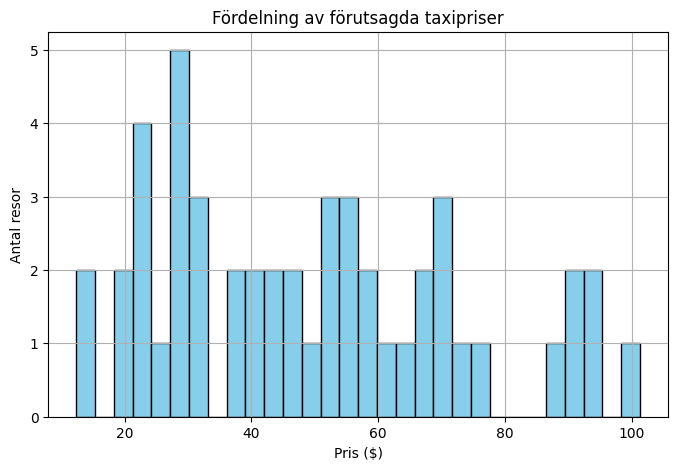

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(df_predict['Trip_Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Fördelning av förutsagda taxipriser')
plt.xlabel('Pris ($)')
plt.ylabel('Antal resor')
plt.grid(True)
plt.show()

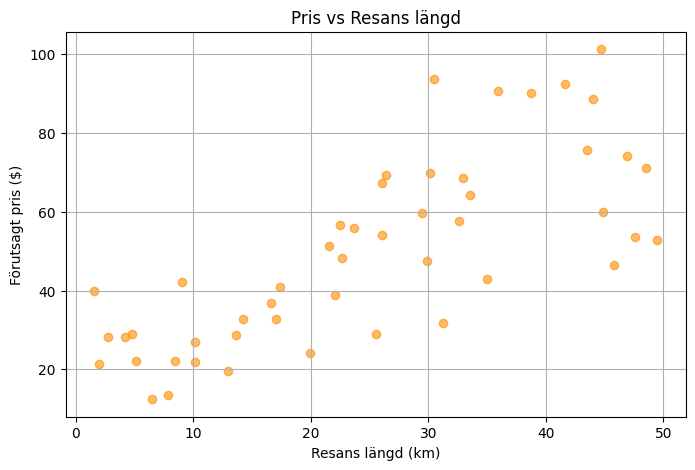

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(df_predict['Trip_Distance_km'], df_predict['Trip_Price'], alpha=0.6, color='darkorange')
plt.title('Pris vs Resans längd')
plt.xlabel('Resans längd (km)')
plt.ylabel('Förutsagt pris ($)')
plt.grid(True)
plt.show()